In [19]:
import time

# Packages

import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import time

In [11]:
# Constants
lower_yellow = np.array([22, 93, 0])
upper_yellow = np.array([45, 255, 255])

# lower_purple = np.array([130, 50, 50])
# upper_purple = np.array([160, 255, 255])
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([170, 255, 255])

path = 'C:/Users/rajam/PycharmProjects/ChargedUpObjectDetectionData/EdgeImpulse/training/*.jpg'

# Load images

images = glob.glob(path)

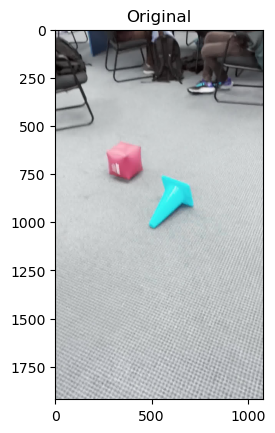

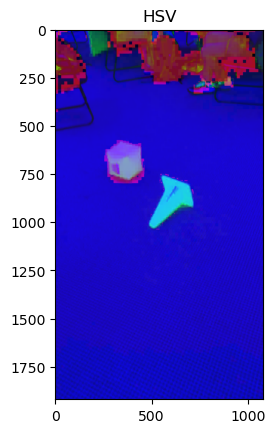

In [12]:
# Read image

image = cv2.imread(images[50])
plt.imshow(image)
plt.title('Original')
plt.show()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

plt.imshow(image_hsv)
plt.title('HSV')
plt.show()

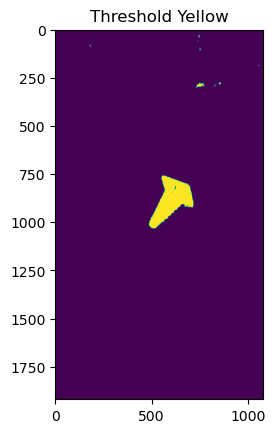

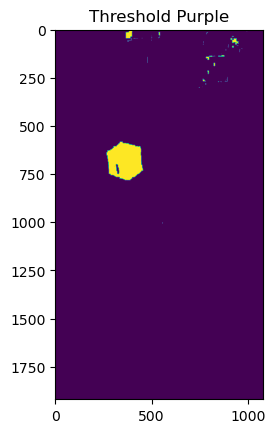

In [13]:
image_threshold_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)
image_threshold_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

plt.imshow(image_threshold_yellow)
plt.title('Threshold Yellow')
plt.show()

plt.imshow(image_threshold_purple)
plt.title('Threshold Purple')
plt.show()

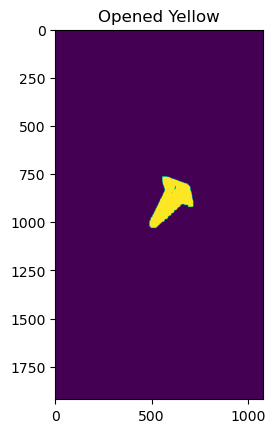

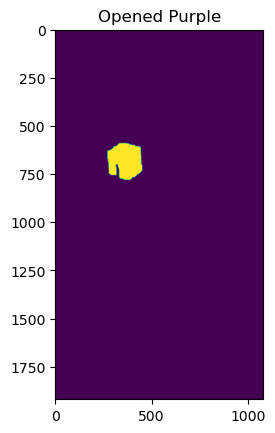

In [14]:
kernel = np.ones((25, 25))
threshold_yellow_open = cv2.morphologyEx(image_threshold_yellow, cv2.MORPH_OPEN, kernel)
threshold_purple_open = cv2.morphologyEx(image_threshold_purple, cv2.MORPH_OPEN, kernel)
plt.imshow(threshold_yellow_open)
plt.title('Opened Yellow')
plt.show()
plt.imshow(threshold_purple_open)
plt.title('Opened Purple')
plt.show()

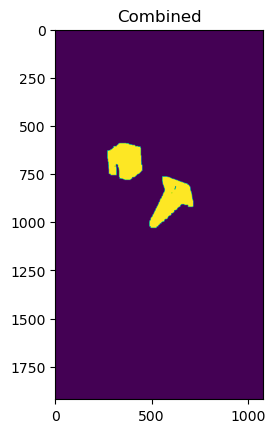

Contour 0 has 4 sides
Contour 1 has 6 sides


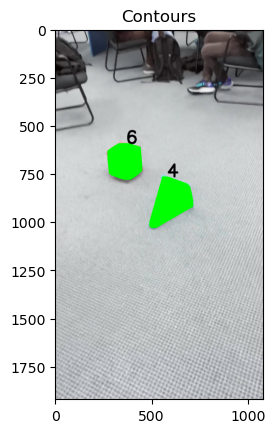

In [15]:
# combine both images and find contours
combined = cv2.bitwise_or(threshold_yellow_open, threshold_purple_open)
plt.imshow(combined)
plt.title('Combined')
plt.show()

contours, hierarchy = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# turn the contours into convex hulls
hulls = [cv2.convexHull(c) for c in contours]

# calculate the shape of each contour and label it next to the contour using cv2.approxPloyDP
for i, c in enumerate(hulls):
    # calculate the shape of each contour
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * perimeter, True)
    print('Contour {} has {} sides'.format(i, len(approx)))
    cv2.putText(image, str(len(approx)), tuple(c[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 10)


# draw the contours on the original image
image_copy = image.copy()
cv2.drawContours(image_copy, hulls, -1, (0, 255, 0), -1)
plt.imshow(image_copy)
plt.title('Contours')
plt.show()


Contour 0 has 3 sides
Contour 1 has 5 sides
Time taken: 0.04457807540893555


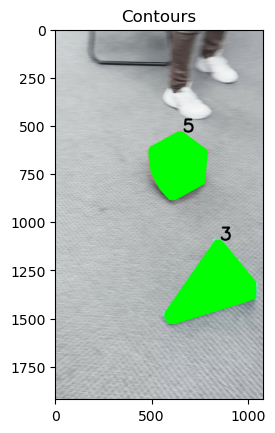

Contour 0 has 3 sides
Contour 1 has 6 sides
Time taken: 0.03454852104187012


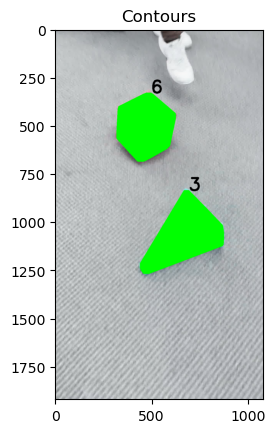

Contour 0 has 4 sides
Contour 1 has 6 sides
Contour 2 has 4 sides
Contour 3 has 4 sides
Contour 4 has 4 sides
Contour 5 has 5 sides
Time taken: 0.038579463958740234


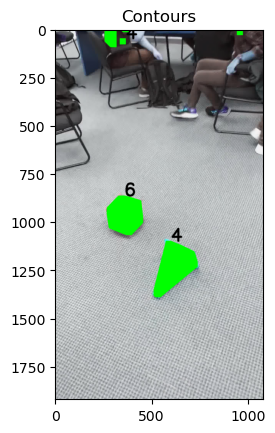

Contour 0 has 4 sides
Contour 1 has 6 sides
Contour 2 has 4 sides
Contour 3 has 5 sides
Contour 4 has 6 sides
Time taken: 0.03953886032104492


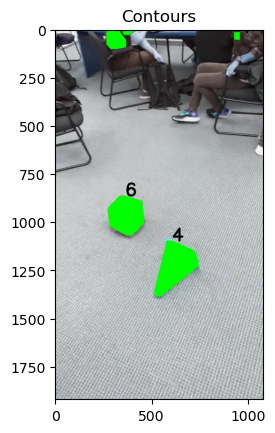

Contour 0 has 4 sides
Contour 1 has 6 sides
Contour 2 has 4 sides
Contour 3 has 4 sides
Time taken: 0.03625941276550293


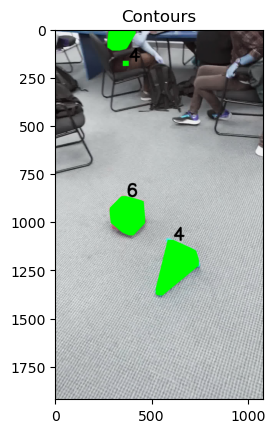

Contour 0 has 4 sides
Contour 1 has 6 sides
Contour 2 has 5 sides
Time taken: 0.03661990165710449


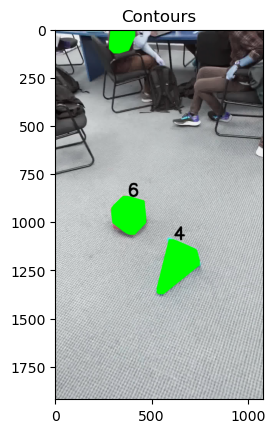

Contour 0 has 4 sides
Contour 1 has 6 sides
Contour 2 has 6 sides
Time taken: 0.036528825759887695


KeyboardInterrupt: 

In [20]:
# Go through all the images and show all images in a grid at the end with the contours
for image in images:
    start = time.time()
    image = cv2.imread(image)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    image_threshold_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)
    image_threshold_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

    kernel = np.ones((25, 25))
    threshold_yellow_open = cv2.morphologyEx(image_threshold_yellow, cv2.MORPH_OPEN, kernel)
    threshold_purple_open = cv2.morphologyEx(image_threshold_purple, cv2.MORPH_OPEN, kernel)

    combined = cv2.bitwise_or(threshold_yellow_open, threshold_purple_open)

    contours, hierarchy = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    hulls = [cv2.convexHull(c) for c in contours]

    for i, c in enumerate(hulls):
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * perimeter, True)
        print('Contour {} has {} sides'.format(i, len(approx)))
        cv2.putText(image, str(len(approx)), tuple(c[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 10)

    image_copy = image.copy()
    cv2.drawContours(image_copy, hulls, -1, (0, 255, 0), -1)

    end = time.time()
    print('Time taken: {}'.format(end - start))
    plt.imshow(image_copy)
    plt.title('Contours')
    plt.show()